In [1]:
#Data
#https://app.flipsidecrypto.com/velocity/collections/v2/3ae628ba-dbcd-47d9-b606-7f2b98555a3b - Flipside Data

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [3]:


def getquery(requesturl):
    try:
        response = requests.get(requesturl)
        response.raise_for_status()
        # access JSOn content
        return response.json()
        #print("Entire JSON response")
        #print(api_output[0]) #validate response from API

    except HTTPError as http_err:
        return(f'HTTP error occurred: {http_err}')
    except Exception as err:
        return(f'Other error occurred: {err}')


In [15]:
#get Api data
terra_gini = getquery('https://api.flipsidecrypto.com/api/v2/queries/2aa90898-9bfd-4e5e-a5d3-87c37fe32019/data/latest')

terra_gini = pd.json_normalize(terra_gini)
terra_gini['DATE'] = pd.to_datetime(terra_gini['DATE'])
terra_gini

,DATE,GINI,TOTAL_VOTING_POWER
0,2019-12-13 00:00:00+00:00,0.680016,250370679
1,2019-12-14 00:00:00+00:00,0.660705,859833823
2,2019-12-15 00:00:00+00:00,0.659159,799919054
3,2019-12-16 00:00:00+00:00,0.639659,1182375052
4,2019-12-17 00:00:00+00:00,0.623807,1447394464
...,...,...,...
597,2021-08-15 00:00:00+00:00,0.495216,23376526529
598,2021-08-16 00:00:00+00:00,0.486858,39491326006
599,2021-08-17 00:00:00+00:00,0.475912,40789182880
600,2021-08-18 00:00:00+00:00,0.481763,41062705103


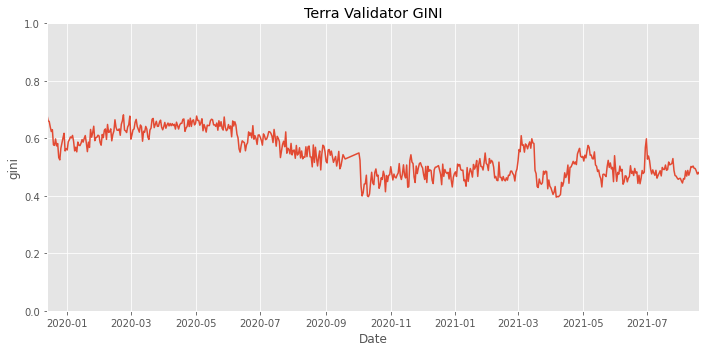

In [16]:
plt.figure()
plt.plot(terra_gini['DATE'],terra_gini['GINI'])
plt.title('Terra Validator GINI')
plt.xlabel('Date')
plt.ylabel('gini')
plt.ylim(0,1)
plt.tight_layout()
plt.rcParams["figure.figsize"]=(10,5)
plt.margins(x=0)